### In this post, we will try to compare different activation functions like sigmoid, tanh, ReLU and leaky ReLU on same neural networks and try to explain why one performs better than the other. So let's get started!
#### We will use a fully connected neural network on MNIST data. MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Total training examples we have : 60000
Total test examples we have : 10000

Size of each example is : (784,)
One sample image : 


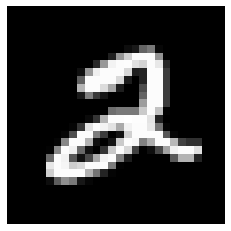

In [2]:
#Get the MNIST data
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels

def get_mnist_data():
    with open('./train-images-idx3-ubyte.gz', 'rb') as f:
        train_images = extract_images(f)
        train_images_reshaped = [];
        for image in train_images:
            train_images_reshaped.append(image.reshape(784))
        train_images = np.array(train_images_reshaped)
    with open('./train-labels-idx1-ubyte.gz', 'rb') as f:
        train_labels = to_categorical(extract_labels(f))
    with open('./t10k-images-idx3-ubyte.gz', 'rb') as f:
        test_images = extract_images(f)
        test_images_reshaped = [];
        for image in test_images:
            test_images_reshaped.append(image.reshape(784))
        test_images = np.array(test_images_reshaped)
    with open('./t10k-labels-idx1-ubyte.gz', 'rb') as f:
        test_labels = to_categorical(extract_labels(f))
    return (train_images,train_labels), (test_images,test_labels)

(x_train,y_train), (x_test,y_test) = get_mnist_data()

print('Total training examples we have : {}'.format(x_train.shape[0]))
print('Total test examples we have : {}\n'.format(x_test.shape[0]))
print('Size of each example is : {}'.format(x_train.shape[1:]))
print('One sample image : ')
plt.imshow(x_train[5].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

In [27]:
#Let's setup the network now
from keras.layers import Activation,LeakyReLU

def model( activationFn, hiddenLayer1Size = 120, hiddenLayer2Size = 50, nepochs=20 ):
    print('\n\nBuilding model with activatioFn {}, hiddenLayer1Size {} and hiddenLayer2Size {}'\
          .format(activationFn, hiddenLayer1Size, hiddenLayer2Size));
    if( activationFn == 'leakyReLU' ):
        activationFn = LeakyReLU()
    if isinstance(activationFn,str):
        activationFn = Activation(activationFn)
    model = Sequential()
    model.add(Dense(hiddenLayer1Size, input_dim=784))
    model.add(activationFn)
    model.add(Dense(hiddenLayer2Size))
    model.add(activationFn)
    model.add(Dense(10, activation='softmax')) #output layer

    z = model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=nepochs, verbose=False)
    _, accuracy = model.evaluate( x_test, y_test )
    print('Test accuracy:',accuracy)
    return accuracy

In [5]:
results = {};
for hiddenLayer1Size in [ 20, 50, 100, 150 ]:
    for hiddenLayer2Size in [20, 40, 60 ]:
        for activationFn in [ 'tanh', 'sigmoid', 'relu', 'leakyReLU' ]:
            results[ (hiddenLayer1Size, hiddenLayer2Size, activationFn) ] = model(activationFn, hiddenLayer1Size, hiddenLayer2Size)



Building model with activatioFn tanh, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 0s 19us/step
Test accuracy: 0.8967


Building model with activatioFn sigmoid, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 0s 23us/step
Test accuracy: 0.9003


Building model with activatioFn relu, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 0s 14us/step
Test accuracy: 0.9415


Building model with activatioFn leakyReLU, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 0s 21us/step
Test accuracy: 0.9161


Building model with activatioFn tanh, hiddenLayer1Size 20 and hiddenLayer2Size 40
10000/10000 [==============================] - 0s 21us/step
Test accuracy: 0.8911


Building model with activatioFn sigmoid, hiddenLayer1Size 20 and hiddenLayer2Size 40
10000/10000 [==============================] - 0s 19us/step
Test accuracy: 

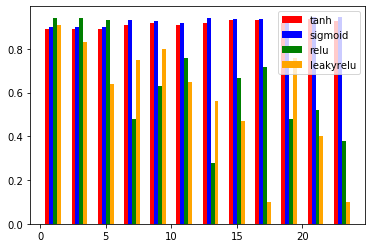

In [21]:
#Let's assume as hidden layer 1 size increases, network size increases too
import matplotlib.pyplot as plt
ax = plt.subplot(111)
x = 1
for h1 in [ 20, 50, 100, 150 ]:
    for h2 in [20, 40, 60 ]:
        sigmoid = ax.bar(x-0.45, results[(h1,h2,'sigmoid')], width=0.30, color='b', align='center')
        tanh =ax.bar(x-0.15, results[(h1,h2,'tanh')], width=0.30, color='r', align='center')
        relu = ax.bar(x+0.15, results[(h1,h2,'relu')], width=0.30, color='g', align='center')
        leakyrelu = ax.bar(x+0.45, results[(h1,h2,'leakyReLU')], width=0.30, color='orange', align='center')
        x = x+ 2;
ax.legend( (tanh,sigmoid,relu,leakyrelu), ('tanh','sigmoid','relu','leakyrelu') )
plt.show()

### Wait!! We expected relu and leakyRelu to perform better than the sigmoid and tanh! What went wrong?
#### Could be that we missed normalizing our data! reLU and leakyReLU may not be very useful if data is not normalized! Let's try for network with hidden layer 1 = 150 and hidden layer 2 = 60 and see how it performs after we normalize the data

In [24]:
x_train = x_train/255
x_test = x_test/255
model('relu', 150, 60)



Building model with activatioFn relu, hiddenLayer1Size 150 and hiddenLayer2Size 60
10000/10000 [==============================] - 1s 138us/step
Test accuracy: 0.9801


### Voila!! So we know, what went wrong..let's re-run all our models again! - but this time on normalized data and fewer epochs

In [28]:
results_norm = {};
for hiddenLayer1Size in [ 20, 50, 100, 150 ]:
    for hiddenLayer2Size in [20, 40, 60 ]:
        for activationFn in [ 'tanh', 'sigmoid', 'relu', 'leakyReLU' ]:
            results_norm[ (hiddenLayer1Size, hiddenLayer2Size, activationFn) ] = model(activationFn, hiddenLayer1Size, hiddenLayer2Size, nepochs=5)



Building model with activatioFn tanh, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 1s 131us/step
Test accuracy: 0.9548


Building model with activatioFn sigmoid, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 1s 150us/step
Test accuracy: 0.9424


Building model with activatioFn relu, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 1s 141us/step
Test accuracy: 0.9571


Building model with activatioFn leakyReLU, hiddenLayer1Size 20 and hiddenLayer2Size 20
10000/10000 [==============================] - 1s 140us/step
Test accuracy: 0.9542


Building model with activatioFn tanh, hiddenLayer1Size 20 and hiddenLayer2Size 40
10000/10000 [==============================] - 2s 157us/step
Test accuracy: 0.9571


Building model with activatioFn sigmoid, hiddenLayer1Size 20 and hiddenLayer2Size 40
10000/10000 [==============================] - 2s 154us/step
Test accu

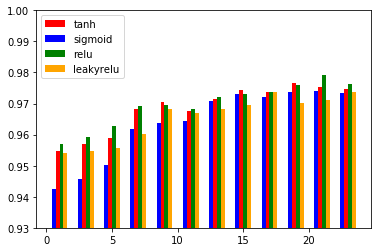

In [31]:
ax = plt.subplot(111)
x = 1
for h1 in [ 20, 50, 100, 150 ]:
    for h2 in [20, 40, 60 ]:
        sigmoid = ax.bar(x-0.45, results_norm[(h1,h2,'sigmoid')], width=0.30, color='b', align='center')
        tanh =ax.bar(x-0.15, results_norm[(h1,h2,'tanh')], width=0.30, color='r', align='center')
        relu = ax.bar(x+0.15, results_norm[(h1,h2,'relu')], width=0.30, color='g', align='center')
        leakyrelu = ax.bar(x+0.45, results_norm[(h1,h2,'leakyReLU')], width=0.30, color='orange', align='center')
        x = x+ 2;
ax.set_ylim([0.93,1.0])
ax.legend( (tanh,sigmoid,relu,leakyrelu), ('tanh','sigmoid','relu','leakyrelu') )
plt.show()

#### As expected, as we increase network size we see improving accuracy for same number of epochs! As per deep learning community, we expect following pattern in the performances of different activations : sigmoid < tanh < relu < leakyReLU. Note that this is general pattern and not always true. We see that this pattern is close to our findings. We however don't see better performance when using leakyReLU as compared to other activations. We see that for same number of epochs, relu provides better accuracy. We also learn the importance of normalization, and why we should always try to include batch normalization in the neural networks to avoid any issues.